In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top1000youtubers/youtubers_df.csv


# Visualization

First we need to see the data set

In [3]:
DF = pd.read_csv('/kaggle/input/top1000youtubers/youtubers_df.csv')

In [4]:
DF.head(10)

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
6,7,LikeNastyaofficial,Juguetes,107500000.0,Unknown,2600000.0,28000.0,0.0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...
7,8,VladandNiki,"Animación, Juguetes",101400000.0,Unknown,4100000.0,22100.0,0.0,http://youtube.com/channel/UCvlE5gTbOvjiolFlEm...
8,9,zeemusiccompany,Música y baile,99700000.0,India,74300.0,2600.0,32.0,http://youtube.com/channel/UCFFbwnve3yF62-tVXk...
9,10,WWE,Videojuegos,97200000.0,Estados Unidos,184500.0,6300.0,214.0,http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D...


In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


# Data Cleaning

We are going to eliminate columns like the links column since they are not useful to us and we will also replace the null value with an "Unknown" value to work better with the data

In [6]:
# Fill missing values in the 'Categories' column with 'Unknown'
DF['Categories'].fillna('Unknow', inplace=True)
# Drop the 'Links' column
DF.drop(columns=['Links'], inplace=True)

In [7]:
# Now, let's create a visualization of the clean DataFrame.
DF.head(10)

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0
3,4,SETIndia,Unknow,162600000.0,India,15600.0,166.0,9.0
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0
5,6,PewDiePie,"Películas, Videojuegos",111500000.0,Estados Unidos,2400000.0,197300.0,4900.0
6,7,LikeNastyaofficial,Juguetes,107500000.0,Unknown,2600000.0,28000.0,0.0
7,8,VladandNiki,"Animación, Juguetes",101400000.0,Unknown,4100000.0,22100.0,0.0
8,9,zeemusiccompany,Música y baile,99700000.0,India,74300.0,2600.0,32.0
9,10,WWE,Videojuegos,97200000.0,Estados Unidos,184500.0,6300.0,214.0


# Youtuber by Categorie

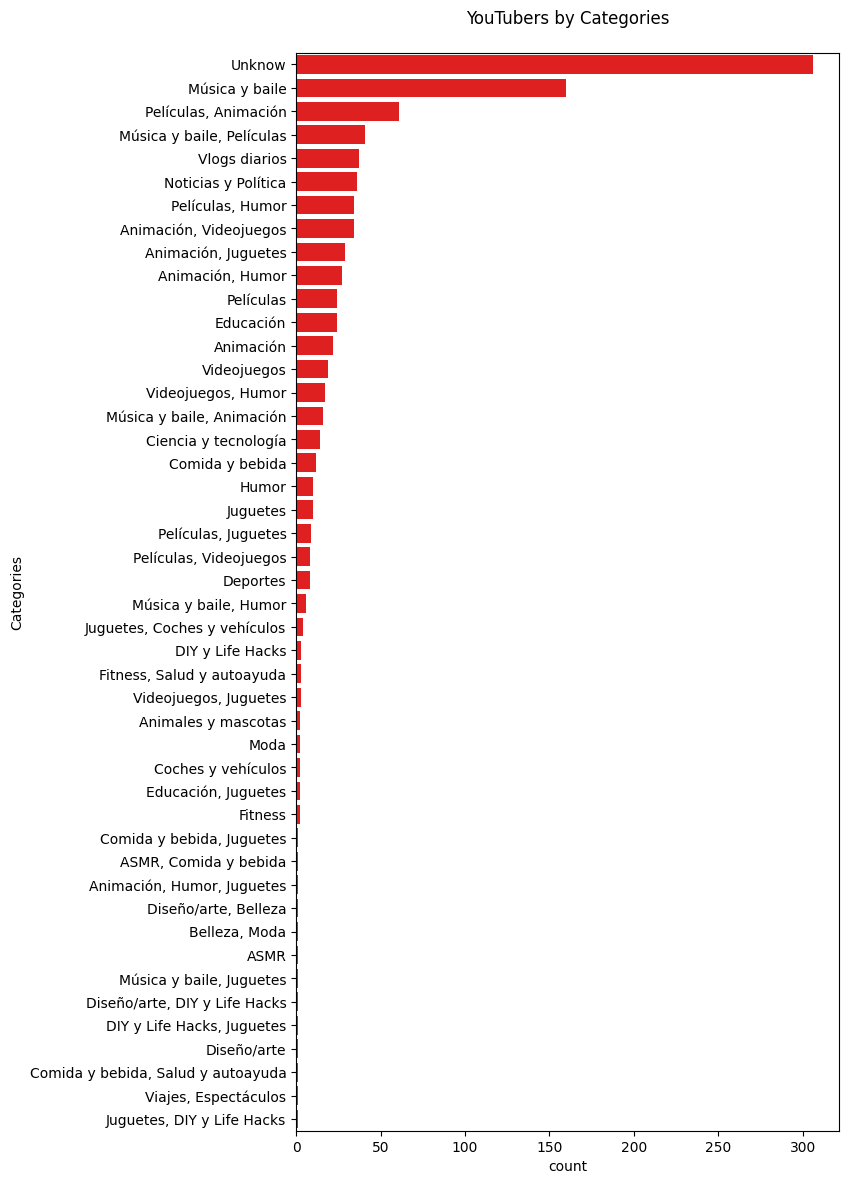

In [21]:
plt.figure(figsize=(7, 14))
sns.countplot(data=DF, y='Categories', color ='#FF0000', order=DF['Categories'].value_counts().index)
plt.title('YouTubers by Categories\n')
plt.show()

# Viewers vs Suscribers

Let's see if there's a relationship between the number of subscribers and the number of views.

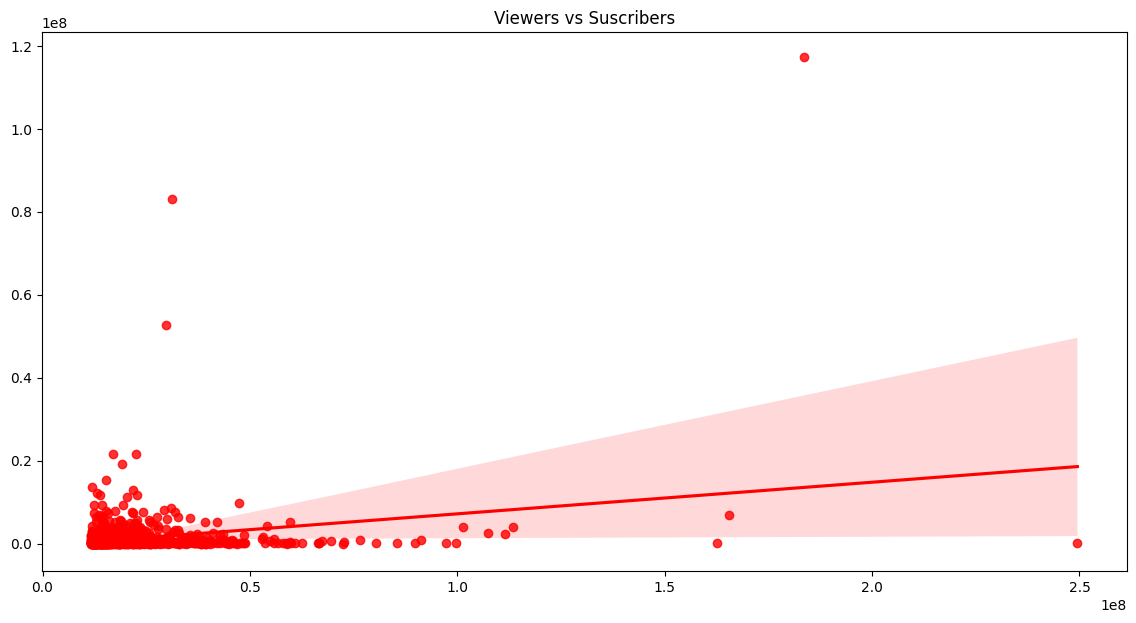

In [20]:
plt.figure(figsize=(14,7))
sns.regplot(data=DF, x='Suscribers', y='Visits', color='#FF0000')
plt.xlabel(None)
plt.ylabel(None)
plt.title('Viewers vs Suscribers')
plt.show()

As we can see, there is a weak correlation, which makes sense when you think about it. We can observe channels like 'Tvseries' with many subscribers but few views due to the quantity, among other examples of YouTubers in the same category.

# Channels with the most views

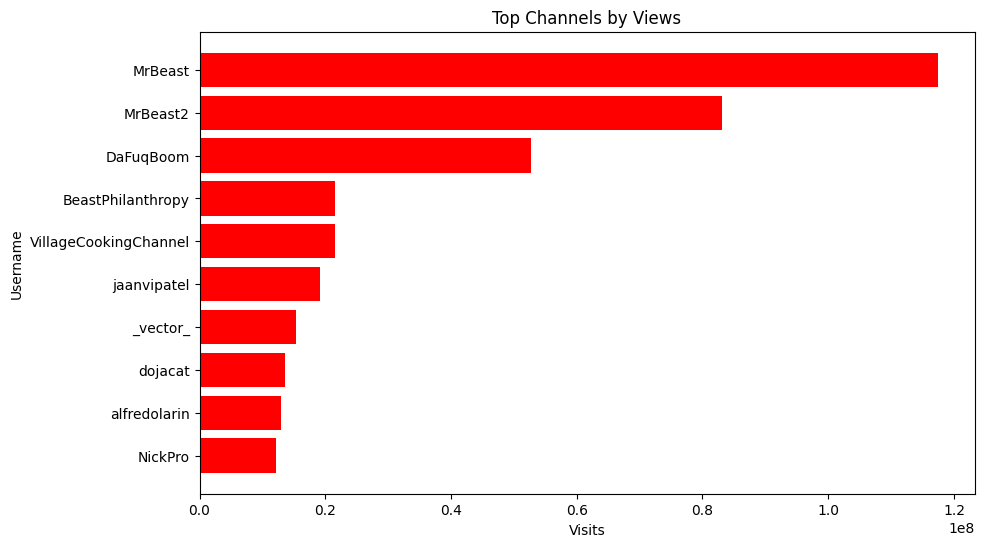

In [22]:
DF_sorted_by_views = DF.sort_values(by='Visits', ascending=False)

top_channels_by_views = DF_sorted_by_views.head(10)


plt.figure(figsize=(10, 6))
plt.barh(top_channels_by_views['Username'], top_channels_by_views['Visits'], color='#FF0000')
plt.xlabel('Visits')
plt.ylabel('Username')
plt.title('Top Channels by Views')
plt.gca().invert_yaxis()  
plt.show()

# Channels with the most subscribers

Now we want to see if there is diference between both 

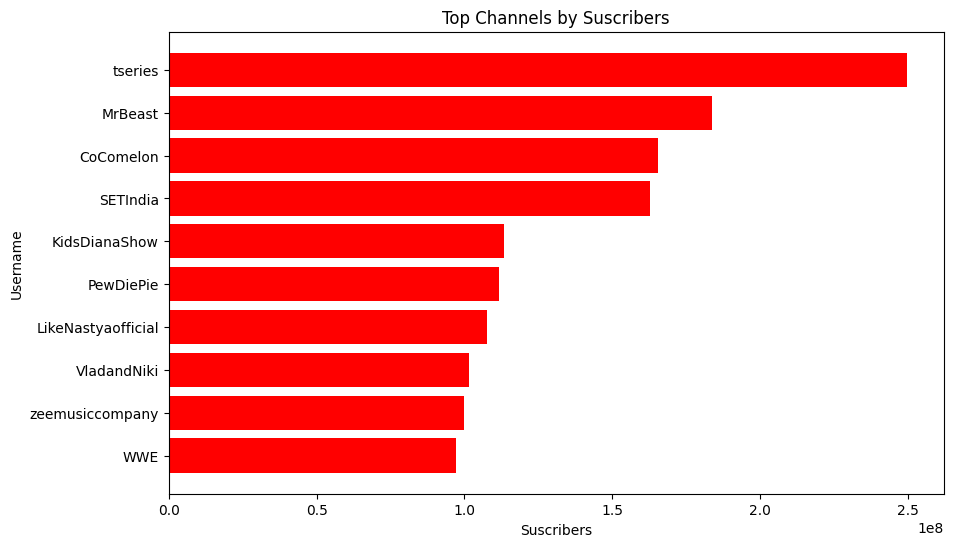

In [23]:
DF_sorted_by_subscribers = DF.sort_values(by='Suscribers', ascending=False)
top_channels_by_subscribers = DF_sorted_by_subscribers.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_channels_by_subscribers['Username'], top_channels_by_subscribers['Suscribers'], color='#FF0000')
plt.xlabel('Suscribers')
plt.ylabel('Username')
plt.title('Top Channels by Suscribers')
plt.gca().invert_yaxis()  
plt.show()


With this we finish confirming that being the channel with the most views perse means being the one with the most subscribers.